# Project 1

Imports

In [114]:
import math
import collections

import scipy
from scipy.linalg import expm
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from scipy.stats import pearsonr
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__


'0.10'

Useful functions

In [3]:
def visualize2(G, big=False):
    if big:
        plt.figure(figsize=(12, 8))
        
    labels = G.nodes()
    pos=nx.spring_layout(G)
    
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=700)

    # edges
    nx.draw_networkx_edges(G,pos,
                        width=6,alpha=0.5,edge_color='b',style='dashed')

    # labels
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

    plt.axis('off')
    plt.show() # display


In [28]:
def degree_distribution(G, hist=False):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    
    if hist:
        plt.hist(vk, bins=range(0, maxk+1), normed=True)
        plt.ylabel("Pk", fontsize=15)
        plt.xlabel("Degree", fontsize=15)
        plt.title("Degree distribution", fontsize=20)
        plt.grid(True)
        plt.show(True)
    
    return kvalues, Pk

In [110]:
def draw_centrality_hist(centralities, title="Defaul title", ylabel="Default ylabel", xlabel="Defaul xlabel"):
    """
    centralities = np.array(centralities)
    maxk = np.max(centralities)
    mink = np.min(centralities)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    """
    
    plt.figure(figsize=(6,4))
    #plt.hist(centralities, bins=range(0, maxk+1), normed=True)
    plt.hist(centralities, density=True)
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.show(True)

In [113]:
def acc(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

Load necessary datasets into all_graphs

In [94]:
# Read all the data we will use now and in the future
all_graphs = {}
all_graphs["E-road"] = nx.read_edgelist("data/euroroad.txt")
all_graphs["Proteins"] = nx.read_edgelist("data/out.proteins", comments="%")
all_graphs["Hamster"] = nx.read_edgelist("data/out.petster-friendships-hamster-uniq", comments="%")
all_graphs["C Elegans 2004"] = nx.read_edgelist("data/wi2004.txt", comments="#")
all_graphs["C Elegans 2007"] = nx.read_edgelist("data/wi2007.txt", comments="#")
all_graphs["US Power Grid"] = nx.read_gml("data/uspowergrid.gml", label="id")
# all_graphs["C elegans"] = nx.read_gml("data/celegansneural.gml")
# all_graphs["US Airports"] = nx.read_edgelist("data/usairport.txt")

# Read from csv file
# df = pd.read_csv("data/rdependencies.csv")
# all_graphs["R Dependencies"] = nx.from_pandas_edgelist(df, create_using=nx.Graph())

# Cities' networks
all_graphs["Motuca"] = ox.graph_from_place('Motuca', network_type='drive', simplify=False)
all_graphs["Mombuca"] = ox.graph_from_place('Mombuca', network_type='drive', simplify=False)
all_graphs["Guatapara"] = ox.graph_from_place('Guatapara', network_type='drive', simplify=False)
all_graphs["Rincao"] = ox.graph_from_place('Rincao', network_type='drive', simplify=False)

# Q1

TODO: importar as redes "C elegans" e "US airports"

### a) E-road

# Q2

## I) Motuca

### Degree

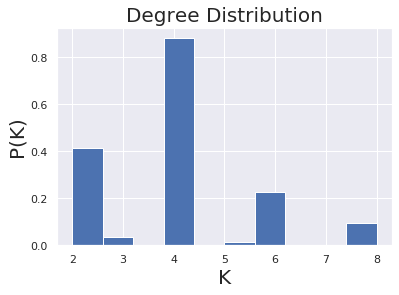

In [79]:
vk = list(dict(all_graphs["Motuca"].degree()).values())

draw_centrality_hist(vk, title="Degree Distribution", ylabel="P(K)", xlabel="K")

### Closeness Centrality

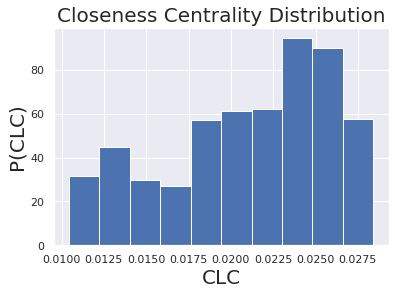

In [67]:
CLC = list(dict(nx.closeness_centrality(all_graphs["Motuca"])).values())

draw_centrality_hist(CLC, title="Closeness Centrality Distribution", ylabel="P(CLC)", xlabel="CLC")

### Betweeness Centrality

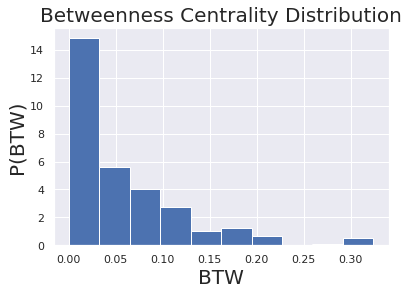

In [72]:
BTW = list(dict(nx.betweenness_centrality(all_graphs["Motuca"])).values())

draw_centrality_hist(BTW, title="Betweenness Centrality Distribution", ylabel="P(BTW)", xlabel="BTW")

## II) Mombuca

### Degree

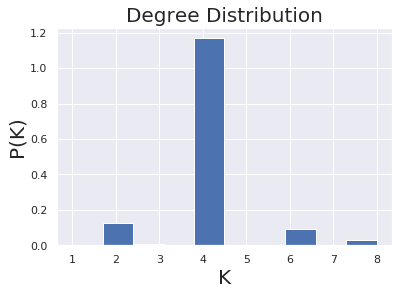

In [76]:
vk = list(dict(all_graphs["Mombuca"].degree()).values())

draw_centrality_hist(vk, title="Degree Distribution", ylabel="P(K)", xlabel="K")

### Closeness Centrality

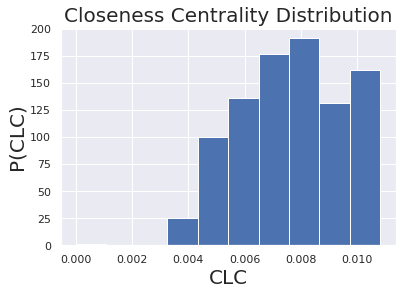

In [68]:
CLC = list(dict(nx.closeness_centrality(all_graphs["Mombuca"])).values())

draw_centrality_hist(CLC, title="Closeness Centrality Distribution", ylabel="P(CLC)", xlabel="CLC")

### Betweeness Centrality

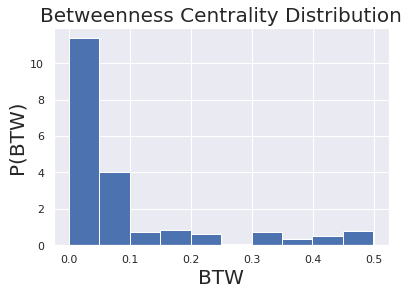

In [73]:
BTW = list(dict(nx.betweenness_centrality(all_graphs["Mombuca"])).values())

draw_centrality_hist(BTW, title="Betweenness Centrality Distribution", ylabel="P(BTW)", xlabel="BTW")

## III) Guatapara

### Degree

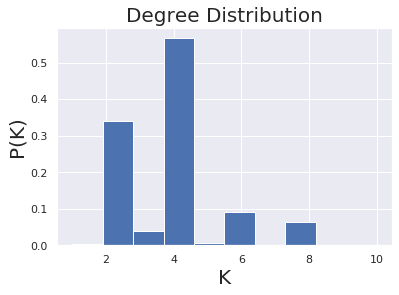

In [77]:
vk = list(dict(all_graphs["Guatapara"].degree()).values())

draw_centrality_hist(vk, title="Degree Distribution", ylabel="P(K)", xlabel="K")

### Closeness Centrality

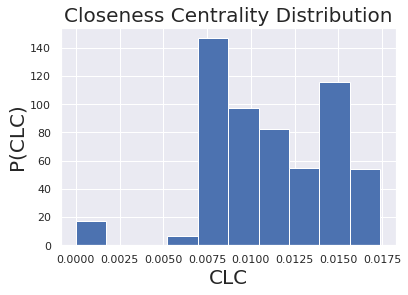

In [69]:
CLC = list(dict(nx.closeness_centrality(all_graphs["Guatapara"])).values())

draw_centrality_hist(CLC, title="Closeness Centrality Distribution", ylabel="P(CLC)", xlabel="CLC")

### Betweeness Centrality

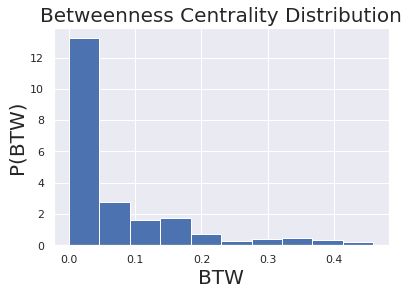

In [74]:
BTW = list(dict(nx.betweenness_centrality(all_graphs["Guatapara"])).values())

draw_centrality_hist(BTW, title="Betweenness Centrality Distribution", ylabel="P(BTW)", xlabel="BTW")

## IV) Rincão

### Degree

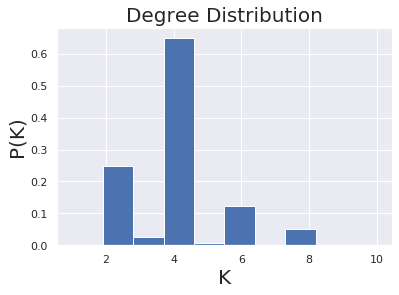

In [78]:
vk = list(dict(all_graphs["Rincao"].degree()).values())

draw_centrality_hist(vk, title="Degree Distribution", ylabel="P(K)", xlabel="K")

### Closeness Centrality

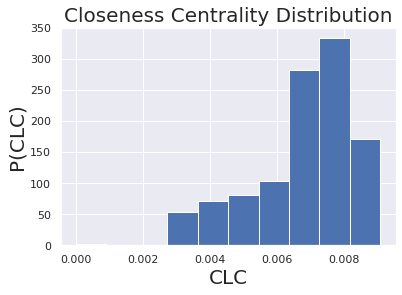

In [70]:
CLC = list(dict(nx.closeness_centrality(all_graphs["Rincao"])).values())

draw_centrality_hist(CLC, title="Closeness Centrality Distribution", ylabel="P(CLC)", xlabel="CLC")

### Betweeness Centrality

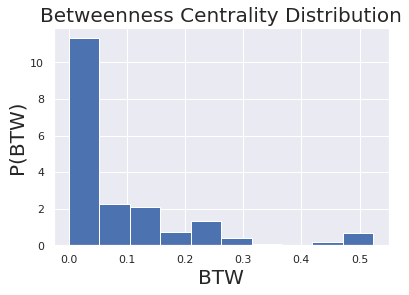

In [75]:
BTW = list(dict(nx.betweenness_centrality(all_graphs["Rincao"])).values())

draw_centrality_hist(BTW, title="Betweenness Centrality Distribution", ylabel="P(BTW)", xlabel="BTW")

TODO: Interpretação dos resultados (placeholder)

# Q3

TODO: importar a rede rdependencies

In [111]:
def q3centralities(nets):
    for net in nets:
        print("=============== " + net + " ===============")
        
        degree_cent = list(dict(all_graphs[net].degree()).values())
        draw_centrality_hist(degree_cent, title="Degree Centrality Histogram", ylabel="P(K)", xlabel="K")
        
        closeness_cent = list(dict(nx.closeness_centrality(all_graphs[net])).values())
        draw_centrality_hist(closeness_cent, title="Closeness Centrality Histogram", ylabel="P(CLC)", xlabel="CLC")
        
        eigenvector_cent = list(dict(nx.eigenvector_centrality(all_graphs[net], max_iter = 1000)).values())
        draw_centrality_hist(eigenvector_cent, title="Eigenvector Centrality Histogram", ylabel="P(EC)", xlabel="EC")
        
        pagerank_cent = list(dict(nx.pagerank(all_graphs[net], alpha=0.85)).values())
        draw_centrality_hist(pagerank_cent, title="Pagerank Centrality Histogram", ylabel="P(PR)", xlabel="PR")

=============== C Elegans 2004 ===============


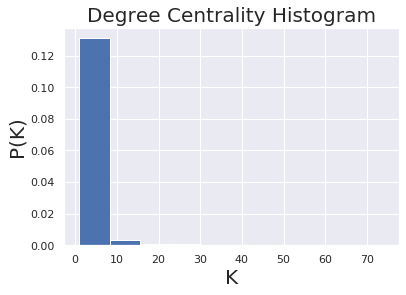

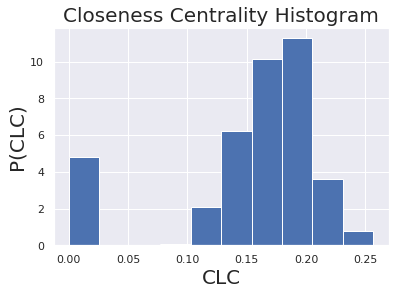

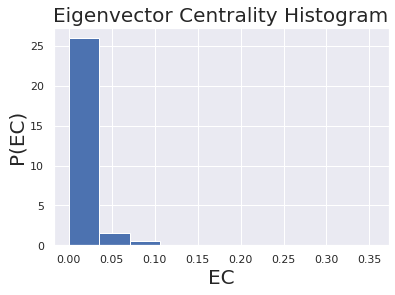

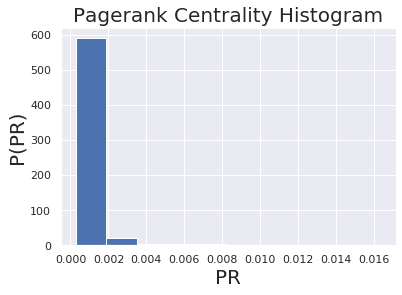

=============== C Elegans 2007 ===============


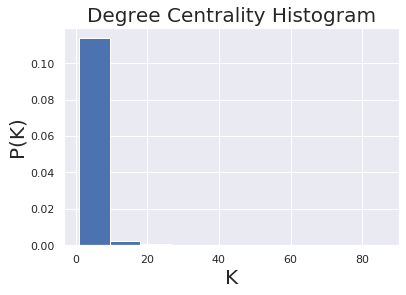

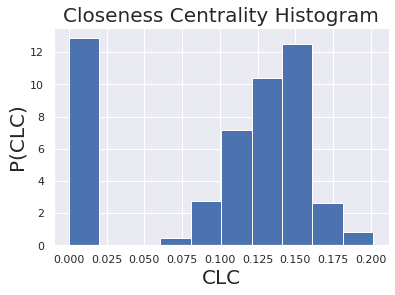

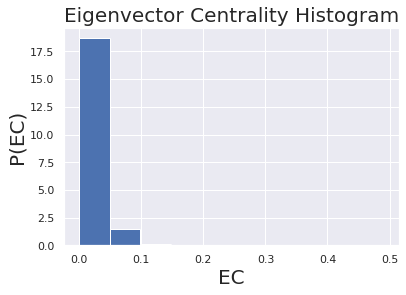

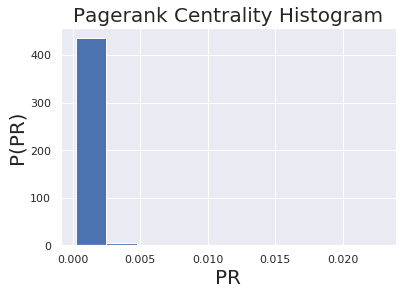

=============== US Power Grid ===============


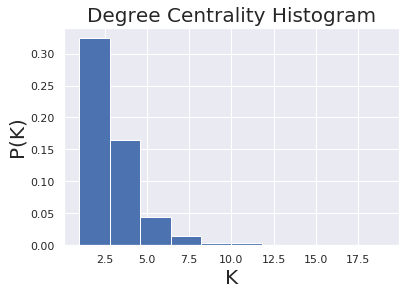

KeyboardInterrupt: 

In [112]:
# q3nets = ["Proteins", "C Elegans 2004", "C Elegans 2007", "US Power Grid"]    
q3nets = ["C Elegans 2004", "C Elegans 2007", "US Power Grid"]    # TODO: usar a linha de cima (demora) e deixar bonito
q3centralities(q3nets)

TODO: interpretar resultados

# Q4

In [117]:
def q4centralities(net):
    degree_cent = list(dict(all_graphs[net].degree()).values())
    kcore_cent = list(dict(nx.core_number(all_graphs[net])).values())
    closeness_cent = list(dict(nx.closeness_centrality(all_graphs[net])).values())
    betweenness_cent = list(dict(nx.betweenness_centrality(all_graphs[net])).values())
    eigenvector_cent = list(dict(nx.eigenvector_centrality(all_graphs[net], max_iter = 1000)).values())
    pagerank_cent = list(dict(nx.pagerank(all_graphs[net], alpha=0.85)).values())
    accessibility_cent = acc(all_graphs[net])
    communicability_cent = list(dict(nx.communicability_betweenness_centrality(all_graphs[net])).values())
        
    return [degree_cent, kcore_cent, closeness_cent, betweenness_cent, eigenvector_cent, pagerank_cent,
           accessibility_cent, communicability_cent]
        

In [119]:
def q4measures(centralities):
    measures = []
    
    for centralitiy in centralities:
        average = np.mean(centrality)
        standard_deviation = np.std(centrality)
        second_moment = scipy.stats.moment(centrality, moment=2)
        shannon_entropy = scipy.stats.entropy(centrality)
        measures.append([average, standard_deviation, second_moment, shannon_entropy])
        
    return measures.flatten()

In [ ]:
# q4nets = ["Proteins", "C Elegans 2004", "C Elegans 2007", "US Power Grid"]    
q4nets = ["US Power Grid"]    # TODO: usar a linha de cima (demora)

features = []
for net in q4nets:
    features.append(q4measures(q4centralities(net)))

TODO: fazer o PCA

# Q5